In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/winequalityN.csv')

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df.update(df.fillna(df.mean()))

<ipython-input-6-b81fef9eea0d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.update(df.fillna(df.mean()))


In [7]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

([<matplotlib.patches.Wedge at 0x7f172da82220>,
 [Text(0.21795660585525245, 1.0781905759020798, '6'),
  Text(-0.8856475408718025, -0.6524020488531049, '5'),
  Text(0.638836959979026, -0.8954816238007102, '7'),
  Text(1.042436035514443, -0.35117960057630165, '4'),
  Text(1.0911169279501793, -0.13951290098253732, '8'),
  Text(1.099794247258724, -0.021274719660120865, '3'),
  Text(1.0999967848873362, -0.002659555888425621, '9')],
 [Text(0.11888542137559223, 0.5881039504920434, '43.65%'),
  Text(-0.48308047683916494, -0.3558556630107845, '32.91%'),
  Text(0.34845652362492324, -0.48844452207311456, '16.61%'),
  Text(0.5686014739169689, -0.19155250940525545, '3.32%'),
  Text(0.595154687972825, -0.0760979459904749, '2.97%'),
  Text(0.5998877712320312, -0.011604392541884107, '0.46%'),
  Text(0.5999982463021832, -0.0014506668482321566, '0.08%')])

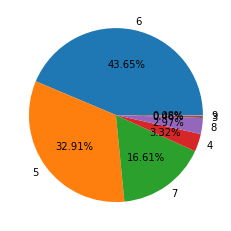

In [9]:
df['quality'].value_counts()
label=df['quality'].value_counts().index
val=df['quality'].value_counts().values
plt.pie(val, labels=label, autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7f172d5c2df0>,
 [Text(-0.8875365678195802, 0.649829855256774, '1'),
  Text(0.8780168306865027, -0.6626359822943737, '2'),
  Text(1.0998842620375917, -0.015956507199958125, '0')],
 [Text(-0.48411085517431646, 0.3544526483218767, '79.88%'),
  Text(0.47891827128354686, -0.36143780852420376, '19.66%'),
  Text(0.5999368702023227, -0.00870354938179534, '0.46%')])

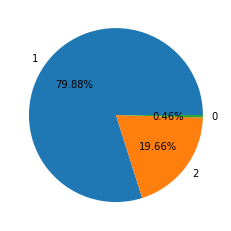

In [10]:
df['quality']=df['quality'].map({3:0,4:1,5:1,6:1,7:2,8:2,9:2})
df['quality'].value_counts()
label=df['quality'].value_counts().index
val=df['quality'].value_counts().values
plt.pie(val, labels=label, autopct='%1.2f%%')

In [11]:
df.drop(["type","free sulfur dioxide"],axis=1,inplace=True)
X=df.drop(['quality'],axis=1)
Y=df['quality']

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

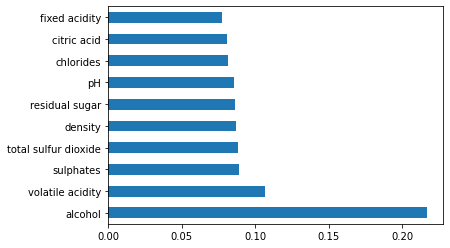

In [13]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

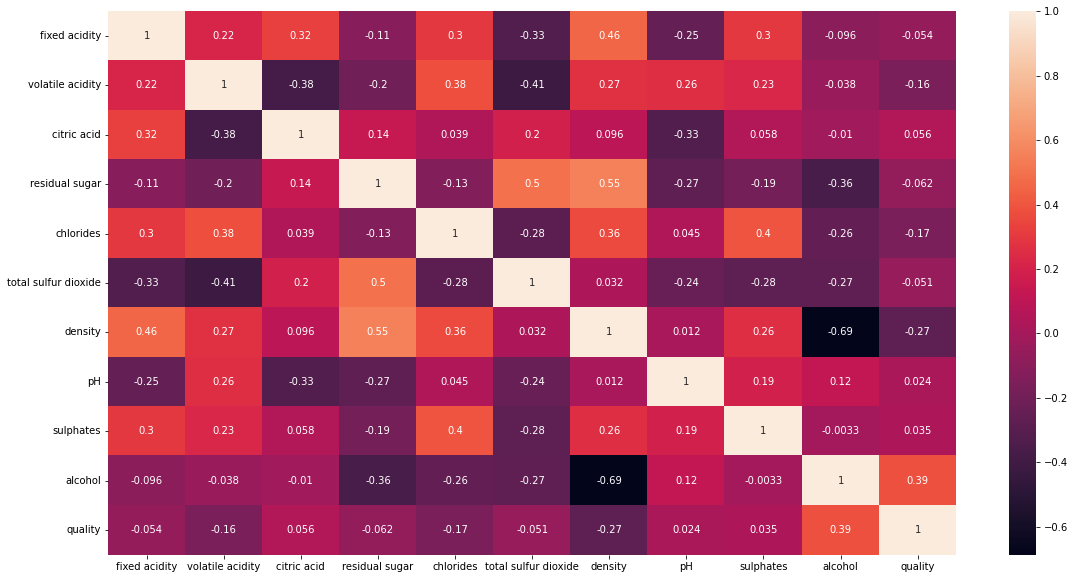

In [14]:
plt.figure(figsize=[19,10])
sb.heatmap(df.corr(),annot=True)

In [15]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >=0.7:
            name = df.corr().columns[a]
            print(name)

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,1


In [18]:
from sklearn.model_selection import train_test_split as tts
xtrn,xtst,ytrn,ytst= tts(X,Y,test_size=0.2,random_state=42)
print(len(xtrn))
print(len(xtst))

5197
1300


#Random Forest

In [19]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer, accuracy_score 
#rf_clf = RandomForestClassifier()

#parameters = {"n_estimators": [200,150,100],
 #             "criterion": ["entropy"],
 #             "max_features": ["log2"], 
   #         "min_samples_leaf": [2, 3]
     #        }

#grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
#grid_cv = grid_cv.fit(xtrn, ytrn)

#print("Our optimized Random Forest model is:")
#grid_cv.best_estimator_

In [20]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=150)
rnd.fit(xtrn,ytrn)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=150)

In [21]:
train_acc=rnd.score(xtrn,ytrn)
test_acc=rnd.score(xtst,ytst)
print('Training Accuracy For Random Forest: ',round(train_acc*100, 2),'%')
print('Testing Accuracy For Random Forest: ',round(test_acc*100, 2),'%')

Training Accuracy For Random Forest:  86.67 %
Testing Accuracy For Random Forest:  83.54 %


#XGBoost

In [22]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(xtrn,ytrn)

XGBClassifier(objective='multi:softprob')

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
ypred = xg.predict(xtst)
cm = confusion_matrix(ytst, ypred)
print(cm)
accuracy_score(ytst, ypred)

[[  0   2   0]
 [  1 986  58]
 [  0 162  91]]


0.8284615384615385

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xg, X = xtrn, y = ytrn, cv = 10)
print("Accuracy For XGBoost: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation For XGBoost: {:.2f} %".format(accuracies.std()*100))

Accuracy For XGBoost: 83.18 %
Standard Deviation For XGBoost: 1.56 %


#KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(xtrn, ytrn)
  
# Calculate the accuracy of the model
print("Accuracy For KNN:",knn.score(xtst, ytst))

Accuracy For KNN: 0.8
